{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [114]:
import torchvision

# 图像增广
IMAGE_SIZE = 32

mean, std = [0.4914, 0.4822, 0.4465], [0.247, 0.243, 0.261]

transform_train = torchvision.transforms.Compose([
    # 在高度和宽度上将图像RESIZE
    torchvision.transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),  # Resize
    torchvision.transforms.RandomHorizontalFlip(0.1),
    torchvision.transforms.RandomRotation(20),
    torchvision.transforms.ColorJitter(brightness=0.1,  #随机颜色抖动
                                       contrast=0.1,
                                       saturation=0.1),
    torchvision.transforms.ToTensor(),
    # 标准化图像的每个通道
    torchvision.transforms.Normalize(mean, std)])

# 在测试期间，只对图像执行标准化，以消除评估结果中的随机性。
transform_test = torchvision.transforms.Compose([
    torchvision.transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean, std)])

transform_train

Compose(
    Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=warn)
    RandomHorizontalFlip(p=0.1)
    RandomRotation(degrees=[-20.0, 20.0], interpolation=nearest, expand=False, fill=0)
    ColorJitter(brightness=(0.9, 1.1), contrast=(0.9, 1.1), saturation=(0.9, 1.1), hue=None)
    ToTensor()
    Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.247, 0.243, 0.261])
)

In [115]:
from torchvision import datasets
import torch
from torch.utils.data import DataLoader

torch.manual_seed(1)

# load and transform
train_dataset = datasets.CIFAR10(root='../data', train=True, download=False, transform=transform_train)
validation_dataset = datasets.CIFAR10(root='../data', train=False, download=False, transform=transform_test)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=100)

In [116]:
# 训练数据集信息
print("训练数据集:")
print("批次数量:", len(train_loader))
print("总样本数量:", len(train_loader.dataset))
print("一个批次的数据形状:", next(iter(train_loader))[0].shape)
print("一个批次的标签形状:", next(iter(train_loader))[1].shape)

# 验证数据集信息
print("\n验证数据集:")
print("批次数量:", len(validation_loader))
print("总样本数量:", len(validation_loader.dataset))
print("一个批次的数据形状:", next(iter(validation_loader))[0].shape)
print("一个批次的标签形状:", next(iter(validation_loader))[1].shape)

训练数据集:
批次数量: 500
总样本数量: 50000
一个批次的数据形状: torch.Size([100, 3, 32, 32])
一个批次的标签形状: torch.Size([100])

验证数据集:
批次数量: 100
总样本数量: 10000
一个批次的数据形状: torch.Size([100, 3, 32, 32])
一个批次的标签形状: torch.Size([100])


In [117]:
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['font.family'] = 'Microsoft YaHei'


def show_data(img):
    try:
        plt.imshow(img[0])
    except Exception as e:
        print(e)
    print(img[0].shape, img[0].permute(1, 2, 0).shape)
    plt.imshow(img[0].permute(1, 2, 0))
    plt.title('实际标签: ' + str(img[1]))
    plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Invalid shape (3, 32, 32) for image data
torch.Size([3, 32, 32]) torch.Size([32, 32, 3])


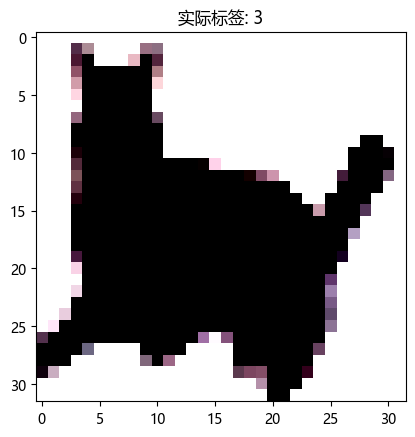

In [118]:
show_data(train_dataset[4564])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Invalid shape (3, 32, 32) for image data
torch.Size([3, 32, 32]) torch.Size([32, 32, 3])


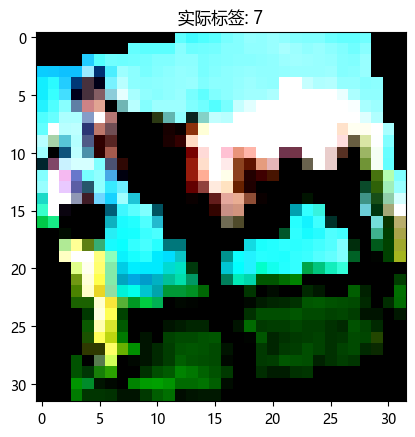

In [119]:
show_data(train_dataset[8976])

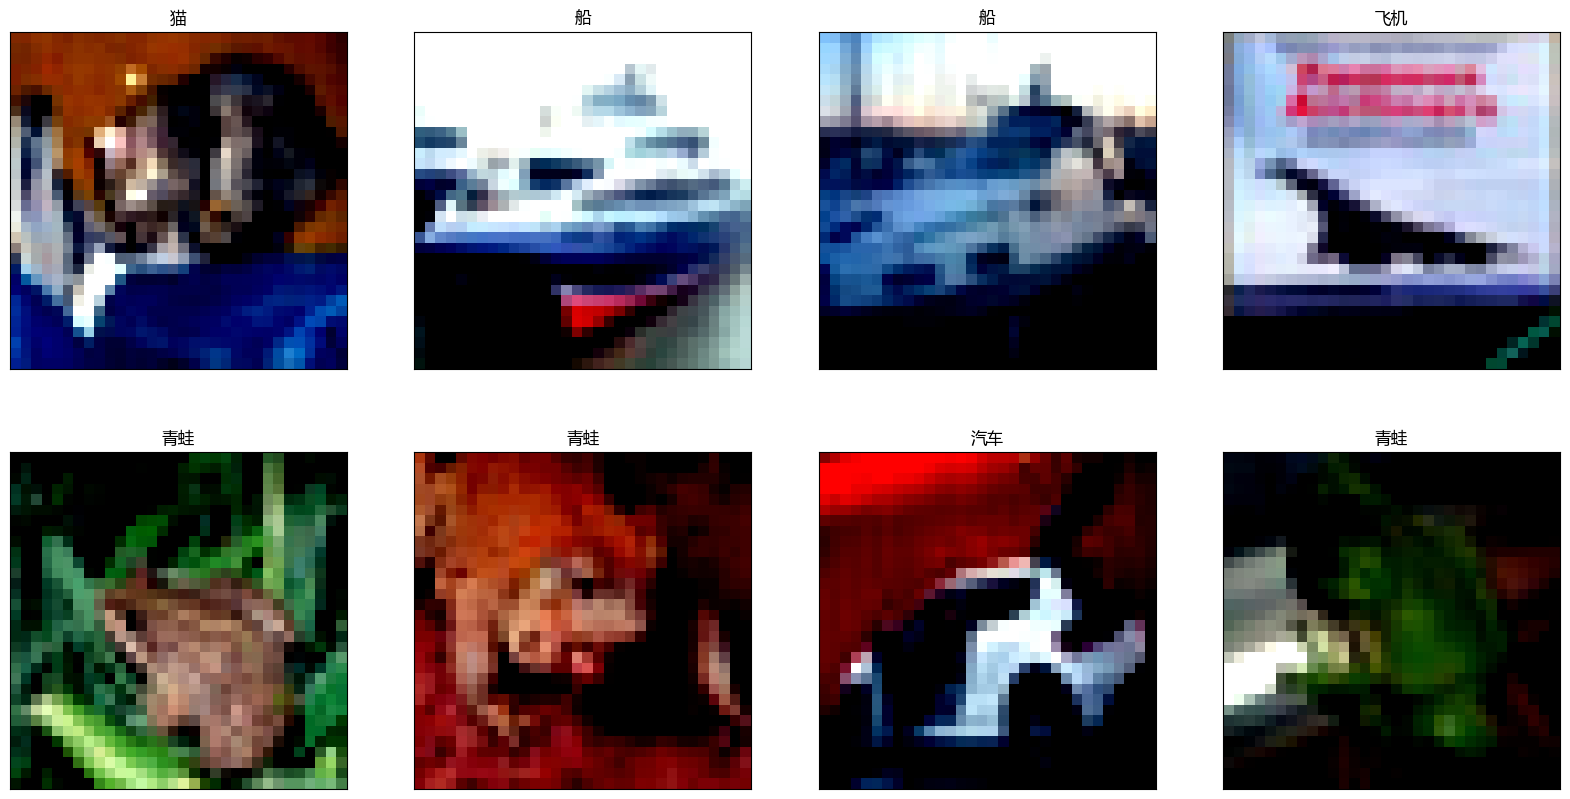

In [120]:
# 将图像从 PyTorch tensor 转换为 NumPy 数组
def im_convert(tensor):
    img = tensor.cpu().clone().detach().numpy()  # 将张量移动到 CPU 并转换为 NumPy 数组
    img = img.transpose(1, 2, 0)  # 转置通道顺序，从 (C, H, W) 到 (H, W, C)
    img = img * np.array(tuple(mean)) + np.array(tuple(std))  # 根据均值和标准差反标准化
    img = img.clip(0, 1)  # 将像素值截断到 [0, 1] 范围
    return img


# CIPHAR 10 数据集中的10个类别
classes = ('飞机',
           '汽车',
           '鸟',
           '猫',
           '鹿',
           '狗',
           '青蛙',
           '马',
           '船',
           '卡车')

# 在数据上定义一个可迭代对象
data_iterable = iter(validation_loader)
images, labels = next(data_iterable)  # 从第一个包含 100 张图像的批次到下一个批次

# 创建一个 20x10 的图形，每个图像的大小为 2x5
fig = plt.figure(figsize=(20, 10))

# 在我们的验证数据集中绘制 10 张图像
for idx in np.arange(8):
    ax = fig.add_subplot(2, 4, idx + 1, xticks=[], yticks=[])

    # imshow 不能打印张量！
    # 使用 im_convert 函数将张量图像转换为 NumPy 数组，然后 用 imshow 打印图像
    plt.imshow(im_convert(images[idx]))
    ax.set_title(classes[labels[idx].item()])

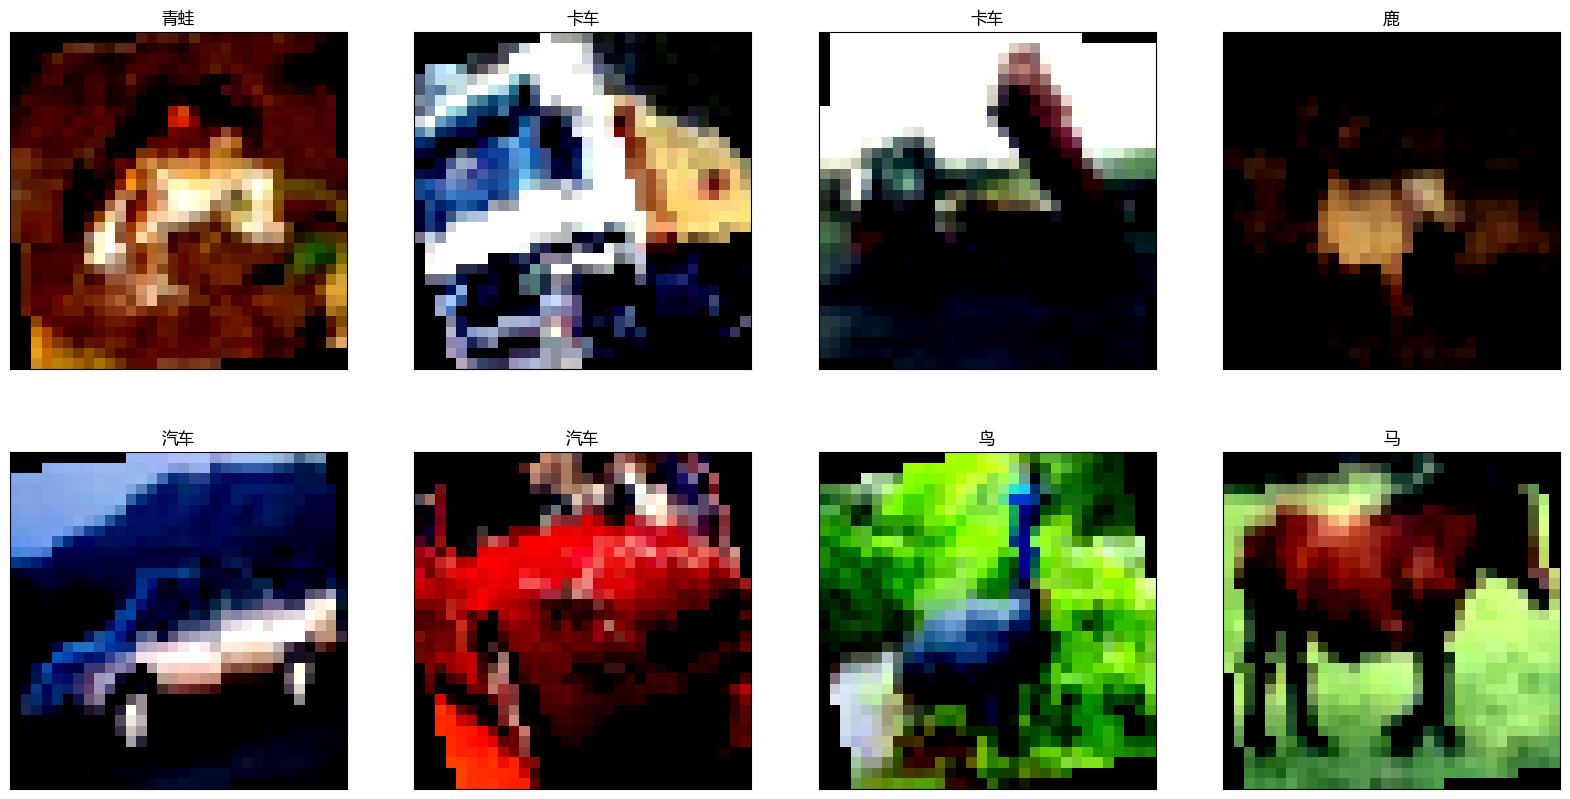

In [121]:
data_iterable = iter(train_loader)
images, labels = next(data_iterable)

# 创建一个 20x10 的图形，每个图像的大小为 2x5
fig = plt.figure(figsize=(20, 10))

# 在我们的训练数据集中绘制 10 张图像
for idx in np.arange(8):
    ax = fig.add_subplot(2, 4, idx + 1, xticks=[], yticks=[])

    # imshow 不能打印张量！
    # 使用 im_convert 函数将张量图像转换为 NumPy 数组，然后 用 imshow 打印图像
    plt.imshow(im_convert(images[idx]))
    ax.set_title(classes[labels[idx].item()])


In [122]:
train_dataset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [123]:
train_dataset.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [124]:
import torch.nn as nn
import torch.nn.functional as F


class CNN_V1(nn.Module):
    """
    添加一个隐藏层、调整 dropout 值、增加一个卷积层
    总共 3 个隐藏层、3 个卷积层和批量归一化
    """

    # 构造函数
    def __init__(self, out_1=32, out_2=64, out_3=128, number_of_classes=10, p=0):
        super(CNN_V1, self).__init__()

        # 第一个卷积层
        self.cnn1 = nn.Conv2d(in_channels=3, out_channels=out_1, kernel_size=5, padding=2)
        self.conv1_bn = nn.BatchNorm2d(out_1)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        self.drop_conv = nn.Dropout(p=0.2)

        # 第二个卷积层
        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, padding=2)
        self.conv2_bn = nn.BatchNorm2d(out_2)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)

        # 第三个卷积层
        self.cnn3 = nn.Conv2d(in_channels=out_2, out_channels=out_3, kernel_size=5, padding=2)
        self.conv3_bn = nn.BatchNorm2d(out_3)
        self.maxpool3 = nn.MaxPool2d(kernel_size=2)

        # 隐藏层 1
        self.fc1 = nn.Linear(out_3 * 4 * 4, 1000)
        self.fc1_bn = nn.BatchNorm1d(1000)
        self.drop = nn.Dropout(p=p)

        # 隐藏层 2
        self.fc2 = nn.Linear(1000, 1000)
        self.fc2_bn = nn.BatchNorm1d(1000)

        # 隐藏层 3
        self.fc3 = nn.Linear(1000, 1000)
        self.fc3_bn = nn.BatchNorm1d(1000)

        # 隐藏层 4
        self.fc4 = nn.Linear(1000, 1000)
        self.fc4_bn = nn.BatchNorm1d(1000)

        # 最终输出层
        self.fc5 = nn.Linear(1000, number_of_classes)
        self.fc5_bn = nn.BatchNorm1d(number_of_classes)

    # 前向传播
    def forward(self, x):
        x = self.cnn1(x)
        x = self.conv1_bn(x)
        x = F.relu(x)
        x = self.maxpool1(x)
        x = self.drop_conv(x)

        x = self.cnn2(x)
        x = self.conv2_bn(x)
        x = F.relu(x)
        x = self.maxpool2(x)
        x = self.drop_conv(x)

        x = self.cnn3(x)
        x = self.conv3_bn(x)
        x = F.relu(x)
        x = self.maxpool3(x)
        x = self.drop_conv(x)

        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc1_bn(x)
        x = F.relu(self.drop(x))

        x = self.fc2(x)
        x = self.fc2_bn(x)
        x = F.relu(self.drop(x))

        x = self.fc3(x)
        x = self.fc3_bn(x)
        x = F.relu(self.drop(x))

        x = self.fc4(x)
        x = self.fc4_bn(x)
        x = F.relu(self.drop(x))

        x = self.fc5(x)
        x = self.fc5_bn(x)

        return x


model = CNN_V1(out_1=32, out_2=64, out_3=128, number_of_classes=10, p=0.5)
model

CNN_V1(
  (cnn1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv1_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop_conv): Dropout(p=0.2, inplace=False)
  (cnn2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv3_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=1000, bias=True)
  (fc1_bn): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): D

In [125]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [126]:
def train_model(model, train_loader, validation_loader, optimizer, criterion, n_epochs=20):
    """
    训练和验证模型

    参数：
    - model: 要训练的模型
    - train_loader: 训练数据加载器
    - validation_loader: 验证数据加载器
    - optimizer: 优化器
    - criterion: 损失函数
    - n_epochs: 训练的轮数

    返回：
    - accuracy_list: 每个轮次的验证准确度列表
    - train_cost_list: 每个轮次的训练损失列表
    - val_cost_list: 每个轮次的验证损失列表
    """

    # 全局变量
    N_test = len(validation_loader.dataset)
    accuracy_list = []
    model = model.to(device)
    train_cost_list = []
    val_cost_list = []

    for epoch in range(n_epochs):
        train_COST = 0
        for x, y in train_loader:
            x = x.to(device)
            y = y.to(device)
            model.train()
            optimizer.zero_grad()
            z = model(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            train_COST += loss.item()

        train_COST = train_COST / len(train_loader)
        train_cost_list.append(train_COST)
        correct = 0

        # 在验证数据上进行预测
        val_COST = 0
        for x_test, y_test in validation_loader:
            model.eval()
            x_test = x_test.to(device)
            y_test = y_test.to(device)
            z = model(x_test)
            val_loss = criterion(z, y_test)
            _, yhat = torch.max(z.data, 1)
            correct += yhat.eq(y_test).sum().item()
            val_COST += val_loss.item()

        val_COST = val_COST / len(validation_loader)
        val_cost_list.append(val_COST)

        accuracy = correct / N_test
        accuracy_list.append(accuracy)

        print("--> Epoch Number : {}".format(epoch + 1),
              " | Training Loss : {}".format(round(train_COST, 4)),
              " | Validation Loss : {}".format(round(val_COST, 4)),
              " | Validation Accuracy : {}%".format(round(accuracy * 100, 2)))

    return accuracy_list, train_cost_list, val_cost_list


In [127]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.2)

# Train the model
accuracy_list, train_cost_list, val_cost_list = train_model(model=model, n_epochs=200,
                                                            train_loader=train_loader,
                                                            validation_loader=validation_loader,
                                                            optimizer=optimizer, criterion=criterion)

--> Epoch Number : 1  | Training Loss : 1.6741  | Validation Loss : 1.3484  | Validation Accuracy : 50.45%
--> Epoch Number : 2  | Training Loss : 1.3691  | Validation Loss : 1.1816  | Validation Accuracy : 57.31%
--> Epoch Number : 3  | Training Loss : 1.2339  | Validation Loss : 0.9986  | Validation Accuracy : 64.5%
--> Epoch Number : 4  | Training Loss : 1.1425  | Validation Loss : 0.922  | Validation Accuracy : 67.61%
--> Epoch Number : 5  | Training Loss : 1.0743  | Validation Loss : 0.8516  | Validation Accuracy : 70.15%
--> Epoch Number : 6  | Training Loss : 1.0152  | Validation Loss : 0.8281  | Validation Accuracy : 70.98%
--> Epoch Number : 7  | Training Loss : 0.975  | Validation Loss : 0.7539  | Validation Accuracy : 73.49%
--> Epoch Number : 8  | Training Loss : 0.9431  | Validation Loss : 0.7699  | Validation Accuracy : 73.11%
--> Epoch Number : 9  | Training Loss : 0.9071  | Validation Loss : 0.7534  | Validation Accuracy : 73.89%
--> Epoch Number : 10  | Training Loss :

In [129]:
# 保存模型参数
torch.save(model.state_dict(), '85.7%_cifar-10model.pth')

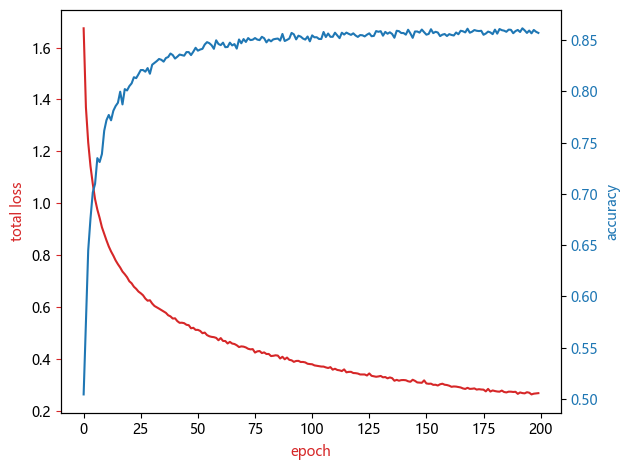

In [130]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(train_cost_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('total loss', color=color)
ax1.tick_params(axis='y', color=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)
ax2.plot(accuracy_list, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()

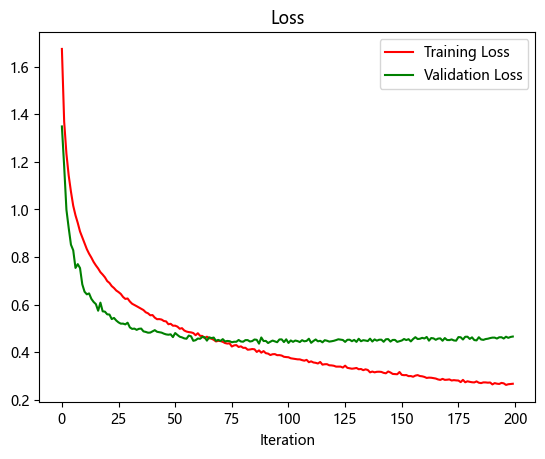

In [131]:
plt.plot(train_cost_list, 'r', label='Training Loss')
plt.plot(val_cost_list, 'g', label='Validation Loss')
plt.xlabel("Iteration")
plt.title("Loss")
plt.legend()

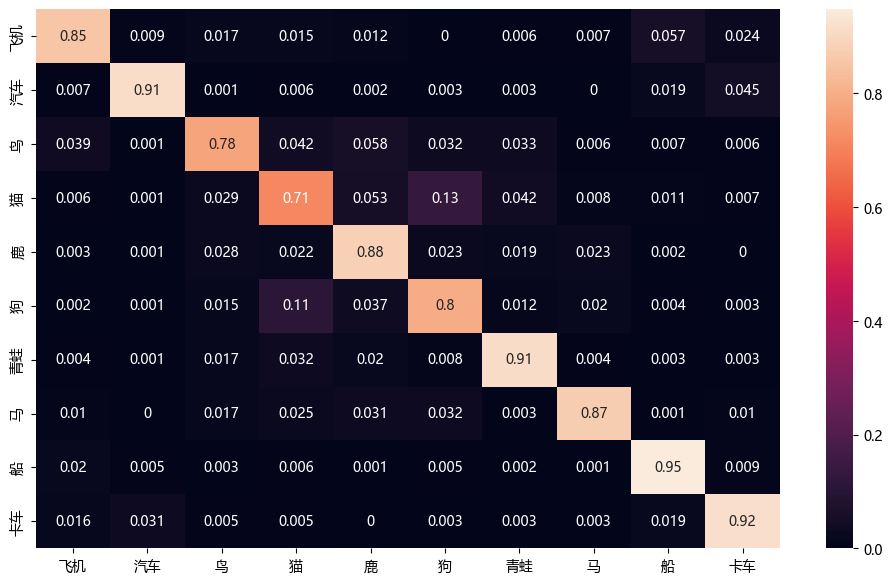

In [132]:
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix

# 初始化预测和真实标签列表
y_pred = []
y_true = []

# 遍历验证数据集
for x, y in torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=1):
    x = x.to(device)
    y = y.to(device)

    # 模型预测
    with torch.no_grad():
        z = model(x)

    _, yhat = torch.max(z, 1)

    # 将预测结果从 GPU 转移到 CPU 并保存
    pred = yhat.cpu().numpy()
    y_pred.extend(pred)

    # 将真实标签从 GPU 转移到 CPU 并保存
    labels = y.cpu().numpy()
    y_true.extend(labels)

# 构建混淆矩阵
cf_matrix = confusion_matrix(y_true, y_pred)

# 构建混淆矩阵的 DataFrame
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix) * 10, index=[i for i in classes], columns=[i for i in classes])

# 绘制热力图
plt.figure(figsize=(12, 7))
sn.heatmap(df_cm, annot=True)

# 保存热力图为图片
plt.savefig('heatmap.png')


In [133]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1000
           1       0.95      0.91      0.93      1000
           2       0.85      0.78      0.81      1000
           3       0.73      0.71      0.72      1000
           4       0.80      0.88      0.84      1000
           5       0.77      0.80      0.78      1000
           6       0.88      0.91      0.89      1000
           7       0.92      0.87      0.90      1000
           8       0.89      0.95      0.92      1000
           9       0.90      0.92      0.91      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



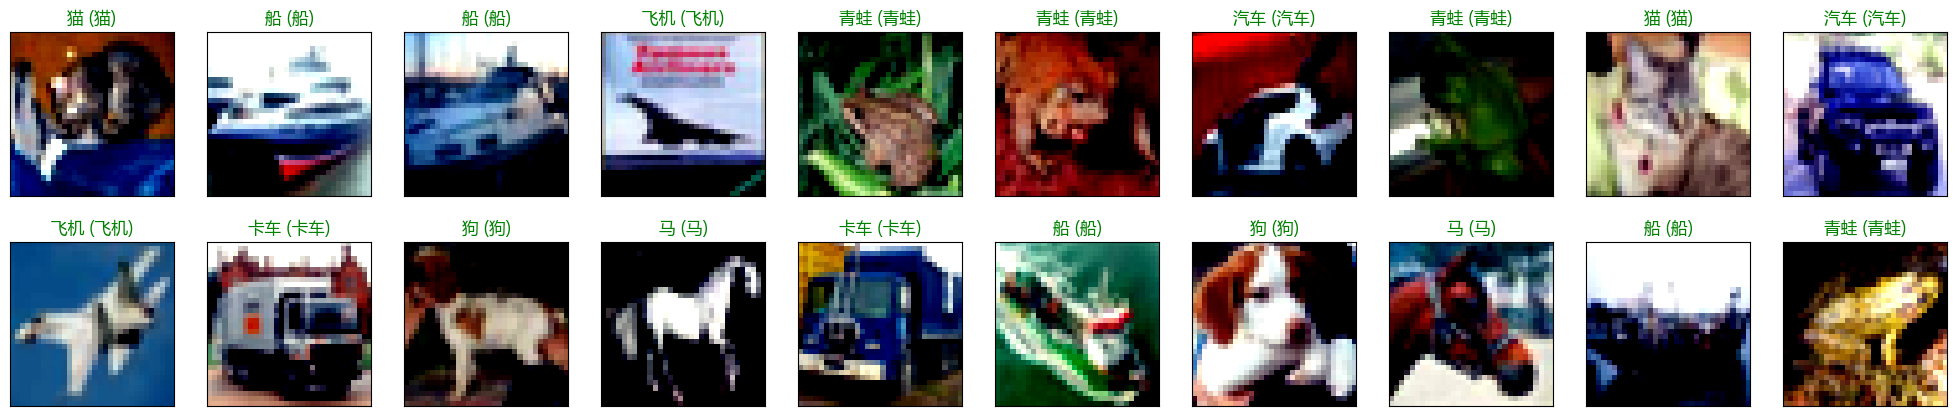

In [154]:
# 从验证数据加载器中获取一个批次的数据
data_iterable = iter(validation_loader)
images, labels = next(data_iterable)

# 将图像和标签移动到设备（GPU 或 CPU）
images = images.to(device)
labels = labels.to(device)

# 使用模型进行预测
output = model(images)
_, preds = torch.max(output, 1)

# 创建一个用于显示图像和预测结果的图表
fig = plt.figure(figsize=(25, 5))

# 遍历显示前 20 张图像
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx + 1, xticks=[], yticks=[])

    # 显示图像
    plt.imshow(im_convert(images[idx]))

    # 设置图像标题，使用绿色表示正确预测，红色表示错误预测
    ax.set_title("{} ({})".format(
        str(classes[preds[idx].item()]), str(classes[labels[idx].item()])),
        color=("green" if preds[idx] == labels[idx] else "red"))

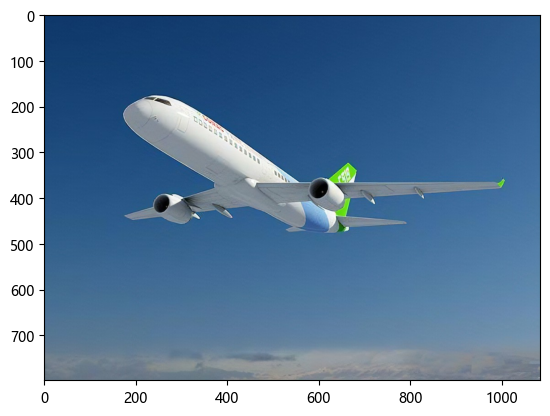

In [140]:
from PIL import Image
import requests

img_url = "https://ts1.cn.mm.bing.net/th/id/R-C.30354c0e9024fc7877633f453394054e?rik=uK0BS61YeZy2hA&riu=http%3a%2f%2fwww.yjcf360.com%2fconcept%2f20170920094240_209.jpg&ehk=8GJF3K1unJMf6IDg3103TAHdKoXeVxpd3Z0JV5GkfDo%3d&risl=&pid=ImgRaw&r=0&sres=1&sresct=1"
response = requests.get(img_url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)

Prediction by Model: 飞机


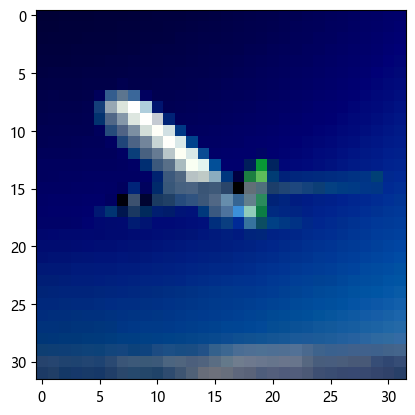

In [141]:
img = transform_test(img)
plt.imshow(im_convert(img))

image = img.to(device).unsqueeze(0)
output = model(image)
_, pred = torch.max(output, 1)
print("Prediction by Model:", (classes[pred.item()]))

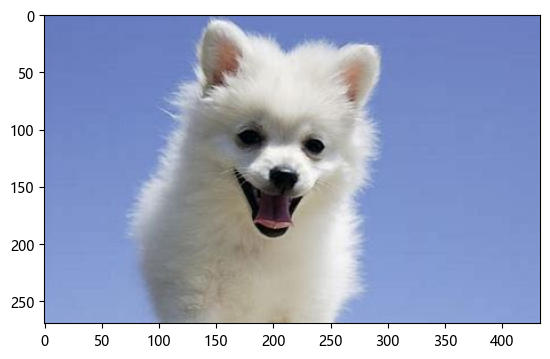

In [146]:
img_url2 = r"C:\Users\lenovo\Downloads\OIP.jpg"

img2 = Image.open(img_url2)
plt.imshow(img2)

Prediction by Model: 狗


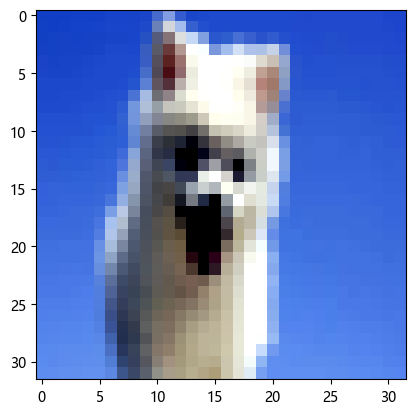

In [147]:
img2 = transform_test(img2)
plt.imshow(im_convert(img2))

image = img2.to(device).unsqueeze(0)
output = model(image)
_, pred = torch.max(output, 1)
print("Prediction by Model:", (classes[pred.item()]))

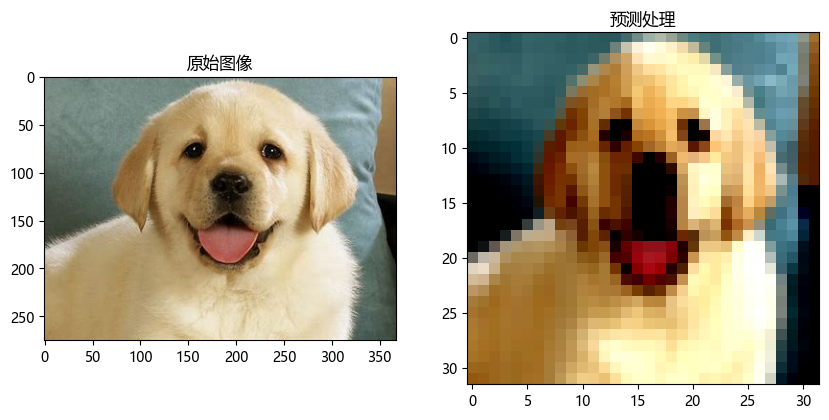

Prediction by Model: 狗


In [150]:
def pre_pic_of_my(img_file_url):
    img = Image.open(img_file_url)

    # 创建一个包含两个子图的图表
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # 显示原始图像
    axs[0].imshow(img)
    axs[0].set_title("原始图像")

    img = transform_test(img)

    # 显示经过 transform 后的图像
    axs[1].imshow(im_convert(img))
    axs[1].set_title("预测处理")

    plt.show()

    image = img.to(device).unsqueeze(0)
    output = model(image)
    _, pred = torch.max(output, 1)
    print("Prediction by Model:", (classes[pred.item()]))


pre_pic_of_my(r"C:\Users\lenovo\Downloads\下载 (2).jpg")

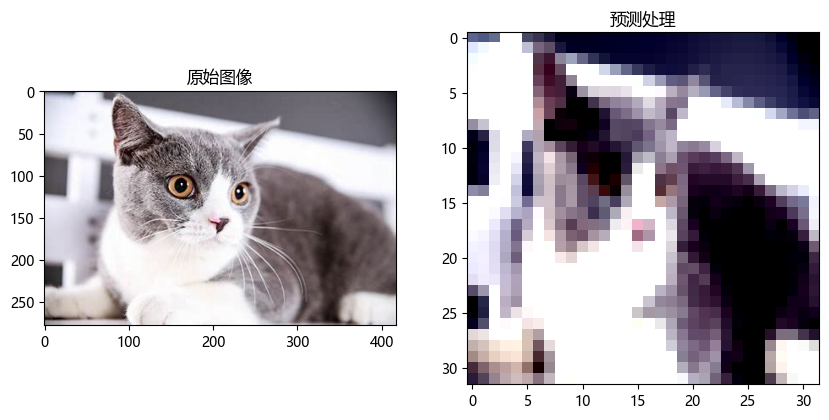

Prediction by Model: 猫


In [151]:
pre_pic_of_my(r"C:\Users\lenovo\Downloads\下载.jpg")

In [ ]:
from torchvision import transforms

IMAGE_SIZE = 224  # We need to resize the images given resnet takes input of image size >= 224

mean, std = [0.4914, 0.4822, 0.4465], [0.247, 0.243, 0.261]
# These values are mostly used by researchers as found to very useful in fast convergence


composed_train = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),  # Resize the image in a 32X32 shape
                                     transforms.RandomRotation(20),  # Randomly rotate some images by 20 degrees
                                     transforms.RandomHorizontalFlip(0.1),  # Randomly horizontal flip the images
                                     transforms.ColorJitter(brightness=0.1,
                                                            # Randomly adjust color jitter of the images
                                                            contrast=0.1,
                                                            saturation=0.1),
                                     transforms.RandomAdjustSharpness(sharpness_factor=2,
                                                                      p=0.1),  # Randomly adjust sharpness
                                     transforms.ToTensor(),  # Converting image to tensor
                                     transforms.Normalize(mean, std),
                                     # Normalizing with standard mean and standard deviation
                                     transforms.RandomErasing(p=0.75, scale=(0.02, 0.1), value=1.0, inplace=False)])

composed_test = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean, std)])

# Load the data and transform the dataset
train_dataset = datasets.CIFAR10(root='../data',
                              train=True,
                              download=False,
                              transform=composed_train)
validation_dataset = datasets.CIFAR10(root='../data',
                                   train=False,
                                   download=False,
                                   transform=composed_test)

# Create train and validation batch for training
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=100)

In [ ]:
def resnet_34():
    # Define the resnet model
    resnet = torchvision.models.resnet34(pretrained=True)

    # Update the fully connected layer of resnet with our current target of 10 desired outputs
    resnet.fc = torch.nn.Linear(resnet.fc.in_features, 10)

    # Initialize with xavier uniform
    torch.nn.init.xavier_uniform_(resnet.fc.weight)
    return resnet

model_mmtv6 = resnet_34()

In [ ]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(),
                            lr = learning_rate,
                            momentum = 0.2)

# Define the Scheduler
scheduler = ReduceLROnPlateau(optimizer, 'min')

# Train the model
accuracy_list_normalv5, train_cost_listv5, val_cost_listv5=train_model(model=model,
                                                                       n_epochs=25,
                                                                       train_loader=train_loader,
                                                                       validation_loader=validation_loader,
                                                                       optimizer=optimizer,
                                                                       scheduler = scheduler)